In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import json

with open('keypoints.json') as json_file:  
    data = json.load(json_file)

In [84]:
class FileVideoStream:
    def __init__(self, path, queueSize=128):
        # initialize the file video stream along with the boolean
        # used to indicate if the thread should be stopped or not
        self.stream = cv2.VideoCapture(path)
        self.stopped = False

        # initialize the queue used to store frames read from
        # the video file
        self.Q = Queue(maxsize=queueSize)

    def start(self):
        # start a thread to read frames from the file video stream
        t = Thread(target=self.update, args=())
        t.daemon = True
        t.start()
        return self

    def update(self):
        # keep looping infinitely
        while True:
            # if the thread indicator variable is set, stop the
            # thread
            if self.stopped:
                return

            # otherwise, ensure the queue has room in it
            if not self.Q.full():
                # read the next frame from the file
                (grabbed, frame) = self.stream.read()

                # if the `grabbed` boolean is `False`, then we have
                # reached the end of the video file
                if not grabbed:
                    self.stop()
                    return

                # add the frame to the queue
                self.Q.put(frame)
                
    def read(self):
        # return next frame in the queue
        return self.Q.get()
    
    def more(self):
        # return True if there are still frames in the queue
        return self.Q.qsize() > 0

    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True

In [80]:
pose_df = pd.DataFrame()
for pose in data:
    pose_dict = {}
    for part in pose:
        for cord_name,cord_val in part['position'].items():
            if part['score']>0.1:
                pose_dict[part['part']+'_'+cord_name] = cord_val
            else:
                pose_dict[part['part']+'_'+cord_name] = np.NAN
    pose_df = pose_df.append(pose_dict, ignore_index=True)

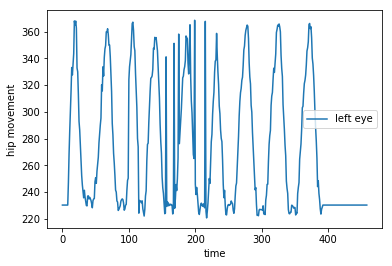

In [82]:
plt.plot(pose_df.index, pose_df.leftHip_y, label='left eye')
# plt.plot(pose_df.index, pose_df.rightEye_y, label='right eye')
plt.xlabel('time')
plt.ylabel('hip movement')
plt.legend()
plt.savefig('graph.png')

In [73]:
pose_df.columns

Index(['leftAnkle_x', 'leftAnkle_y', 'leftEar_x', 'leftEar_y', 'leftElbow_x',
       'leftElbow_y', 'leftEye_x', 'leftEye_y', 'leftHip_x', 'leftHip_y',
       'leftKnee_x', 'leftKnee_y', 'leftShoulder_x', 'leftShoulder_y',
       'leftWrist_x', 'leftWrist_y', 'nose_x', 'nose_y', 'rightAnkle_x',
       'rightAnkle_y', 'rightEar_x', 'rightEar_y', 'rightElbow_x',
       'rightElbow_y', 'rightEye_x', 'rightEye_y', 'rightHip_x', 'rightHip_y',
       'rightKnee_x', 'rightKnee_y', 'rightShoulder_x', 'rightShoulder_y',
       'rightWrist_x', 'rightWrist_y'],
      dtype='object')

In [83]:
import Algorithmia

input = {
  "image": "https://media.guim.co.uk/1abe6d01478f091b3365364da0fcea193c2d40d1/0_158_5472_3283/500.jpg",
  "resolution": "432x368"
}
client = Algorithmia.client('simBrvTtxJZg/c/TZCBlTVKAm4p1')
algo = client.algo('poze/poseEstimation_v2/1.0.0')
algo.set_options(timeout=300) # optional
print(algo.pipe(input).result)

AlgorithmException: 'Failed to start algorithm - Unable to load algorithm due to algorithm error'